In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
#labeled faces in the wild, dataset di foto di personaggi famosi con labels associati

plt.rcParams["figure.dpi"]=120
rng=np.random.RandomState(1)

In [10]:
faces=fetch_lfw_people(min_faces_per_person=30)
#vogliamo le persone che hanno almeno 50 fotografie associate

print(faces.target_names)
print(faces.images.shape)
print(faces.target.shape)
print(faces.target[:10])
#voglio considerare Berlusconi 
print(len(faces.target_names))
#a ritroso berusconi sarà il 29
print(faces.target_names[29])

['Alejandro Toledo' 'Alvaro Uribe' 'Andre Agassi' 'Ariel Sharon'
 'Arnold Schwarzenegger' 'Colin Powell' 'David Beckham' 'Donald Rumsfeld'
 'George W Bush' 'Gerhard Schroeder' 'Gloria Macapagal Arroyo'
 'Guillermo Coria' 'Hans Blix' 'Hugo Chavez' 'Jacques Chirac'
 'Jean Chretien' 'Jennifer Capriati' 'John Ashcroft' 'John Negroponte'
 'Junichiro Koizumi' 'Kofi Annan' 'Laura Bush' 'Lleyton Hewitt'
 'Luiz Inacio Lula da Silva' 'Megawati Sukarnoputri' 'Nestor Kirchner'
 'Recep Tayyip Erdogan' 'Roh Moo-hyun' 'Serena Williams'
 'Silvio Berlusconi' 'Tom Ridge' 'Tony Blair' 'Vicente Fox'
 'Vladimir Putin']
(2370, 62, 47)
(2370,)
[ 8  4 21  8  8 25  4 22  5 22]
George W Bush


[133, 154, 255, 308, 411, 467, 516, 612, 632, 685, 732, 762, 785, 833, 916, 995, 1014, 1068, 1103, 1124, 1205, 1238, 1264, 1281, 1405, 1454, 1458, 1506, 1546, 1987, 2123, 2157, 2282]


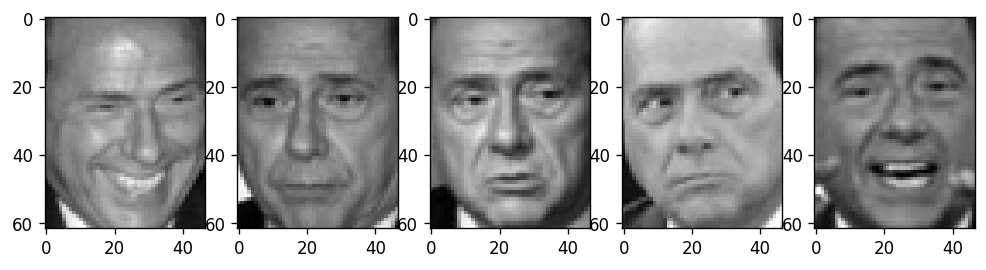

In [21]:
berlusconi_indices=[i for i,v in enumerate(faces.target ) if v==29]
print(berlusconi_indices)
#otteniao tutte le foto in cui appare l'indice 29 corispondente a berlusconi

berlusconi_indices=berlusconi_indices[:5]
fig,axes=plt.subplots(1, len(berlusconi_indices), figsize=(10,5)) #1 rig per 5 foto

#cerchiamo di costuire una immagine fatta di 5 immagini 
for i,ax in enumerate(axes.flat): #axes.flat crea una versione unidimensionale delle foto
    ax.imshow(faces.images[berlusconi_indices[i]], cmap="binary_r")
    #color map

Utilizziamo la pca per ridurre il numero di features in goni immagine e semplificare l'analisi, e poi vedremo cosa riusciremo a ricostruire.

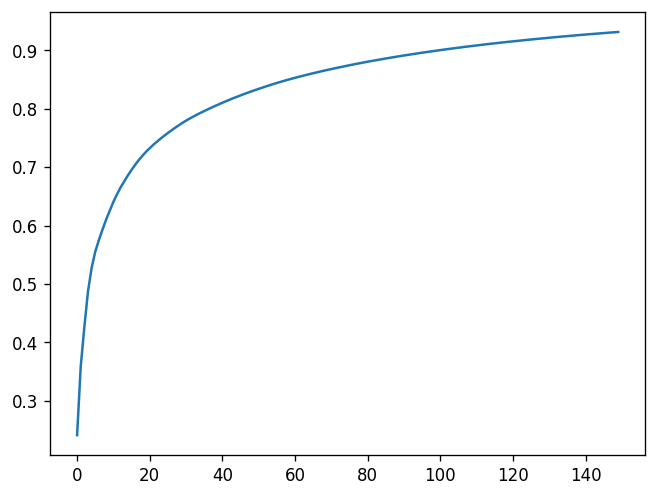

In [24]:
pca=PCA(150)
pca.fit(faces.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

Nel primo dei componenti principali si trova una quantità di varianza intorno al 25% che va scemando all'aumentare delle componenti principali considerate.
Con cumsum vogliamo vedere la pecentuale di varianza accumulata con la considerazione della componenti principali.
Vediamo che arriviamo sopra al 90% con circa 120/130 feature a fronte delle 2370 del dataset iniziale.

Plottiamo du un subplots una prima riga con le immagini prese dal primo dataset iniziare, mentre sulla seconda le foto ottenute dalla riduzione delle features a 150 derivanti dalla pca.

In [26]:
pca.fit(faces.data)
components=pca.transform(faces.data)
reconstruction=pca.inverse_transform(components)


Text(0, 0.5, 'Immagini ricostruite PCA 150')

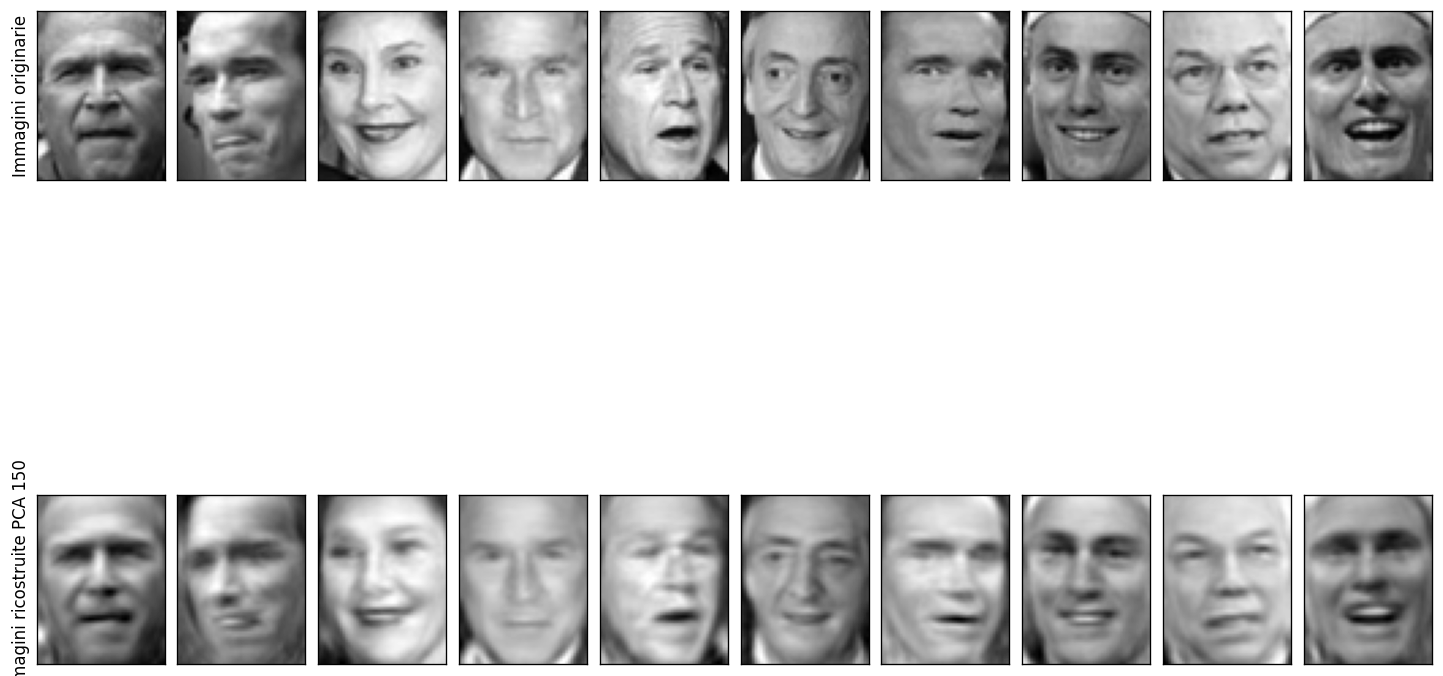

In [42]:
fig, ax=plt.subplots(
    2,10, 
    figsize=(15, 10),
    subplot_kw={'xticks':[],'yticks':[]}, #togliamo le labels sugli assi
    gridspec_kw={
        "hspace":0.1,
        "wspace":0.1
        #Questo imposta lo spazio orizzontale (wspace) e verticale (hspace) 
        #tra i subplot a 0.1 volte la dimensione della figura, in modo che siano più vicini tra loro.
    }
)

for i in range(0,10):
    ax[0,i].imshow(faces.data[i].reshape(62,47),cmap="binary_r")
    ax[1,i].imshow(reconstruction[i].reshape(62,47),cmap="binary_r")
    #reshape alle dimensioni originali 

ax[0,0].set_ylabel("Immagini originarie")
ax[1,0].set_ylabel("Immagini ricostruite PCA 150")